Import Libraries

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

File/Variable Name config

In [2]:
files = ['just_dshock_h.mat', 'just_policy_h.mat', 'dshock_policy_h.mat'] 
variables = ['C', 'IK', 'IH', 'K', 'H', 'Y', 'R', 'D', 'HTOK'] 
experiment_names = ['Debt Relief Only', 'Policy Reform Only', 'Debt Relief & Policy Reform']
title = {'C': 'Consumption (C)', 
         'IK': 'Gross Physical Capital Investment (IK)', 
         'IH': 'Gross Human Capital Investment (IH)', 
         'K': 'Physical Capital (K)', 
         'H': 'Human Capital (H)', 
         'Y': 'Output (Y)', 
         'R': 'Domestic Interest Rate (r, %)', 
         'D': 'External Debt (D)', 
         'HTOK': 'Ratio of Human Capital to Physical Capital (H/K)'
}

color_pallete = {
    'Debt Relief Only': 'red',
    'Policy Reform Only': 'black',
    'Debt Relief & Policy Reform': 'navy'
}

line_styles = {
    'Debt Relief Only': '-',  # Dotted line
    'Policy Reform Only': '-',  # Solid line
    'Debt Relief & Policy Reform': '--'  # Dashed line
}

markers = {
    'Debt Relief Only': 'o',  # Circle markers
    'Policy Reform Only': '',
    'Debt Relief & Policy Reform': ''
}

Plot

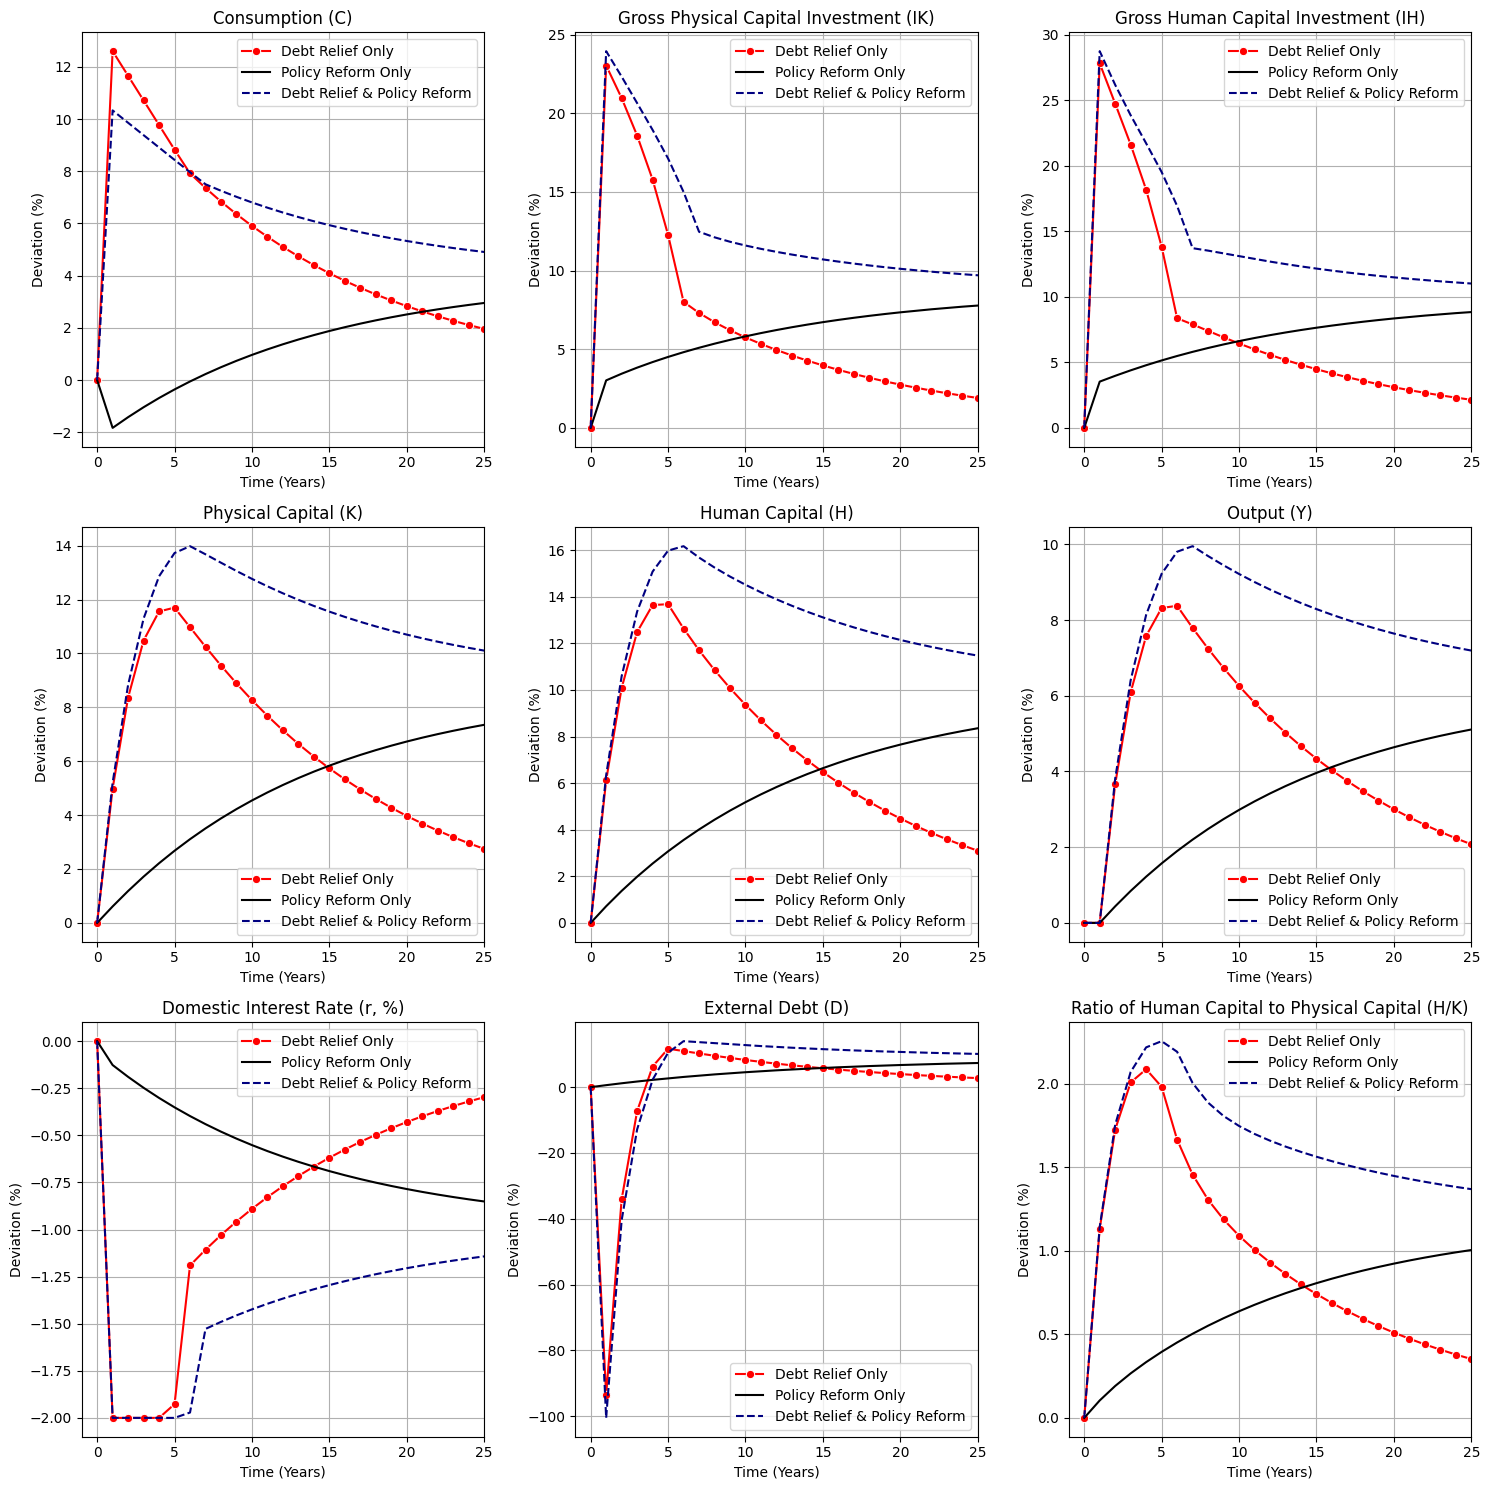

In [3]:
dfs = {var: pd.DataFrame() for var in variables}

for file, exp_name in zip(files, experiment_names):
    data = scipy.io.loadmat(file)
    for var in variables:
        df = pd.DataFrame(data[var])
        df['Experiment'] = exp_name
        df['Index'] = df.index  # Assuming index can be used as x-axis
        dfs[var] = pd.concat([dfs[var], df], ignore_index=True)
        
# Plot the data in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    for exp_name in experiment_names:
        exp_data = dfs[var][dfs[var]['Experiment'] == exp_name]
        sns.lineplot(
            data=exp_data,
            x='Index',
            y=0,  # Adjust y to the correct column if needed
            label=exp_name,
            color=color_pallete[exp_name],
            linestyle=line_styles[exp_name],
            marker=markers[exp_name] if markers[exp_name] else None,
            ax=ax
        )
        
    ax.set_title(title[var])
    ax.set_xlabel('Time (Years)')  
    ax.set_ylabel('Deviation (%)')  
    ax.grid(True)
    ax.set_xlim(-1, 25)  # Set the x-axis limits

plt.tight_layout()
plt.show()